# Clustering Assignment

### Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

Our main aim is to Identify the countries on the basis of Socio econiomic and health factors and identify the countries which are in direst need of aid, so that the funds collected by the NGO can be used strategetically and effectively for those countries in need.

The steps are broadly:

1. Read and understand the data
2. Clean the data
3. EDA
   i)Univariate Analysis
   ii)Outlier Analysis
4. Outlier treatment
5. Hopkins Test
6. Scaling
7. Clustering
   i) KMeans Clustering
   ii) Hierarchical Clustering
       a) Single Linkage
       b) Complete Linkage
6. Final analysis and recommendations

# 1. Read and Understand Data

In [1]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
country_data=pd.read_csv("Country-data.csv",sep=',',encoding='ISO-8859-1',header=0)
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


It is mentioned in the data dictionary that the columns exports, health and Imports are expressed in terms of % of gdpp. So, they need to be converted in to actual values before starting our analysis.

In [3]:
#Converting exports data into actual values
country_data['exports']= (country_data['exports']*country_data['gdpp'])/100

#Converting health data into actual values
country_data['health']= (country_data['health']*country_data['gdpp'])/100

#Converting imports data into actual values
country_data['imports']= (country_data['imports']*country_data['gdpp'])/100

country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [4]:
feature =country_data.columns[:-1]
for i in enumerate(feature):
    print(i)

(0, 'country')
(1, 'child_mort')
(2, 'exports')
(3, 'health')
(4, 'imports')
(5, 'income')
(6, 'inflation')
(7, 'life_expec')
(8, 'total_fer')


In [5]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
country_data.shape

(167, 10)

## 2. Clean the data

In [8]:
# missing values
round(100*(country_data.isnull().sum())/len(country_data), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

 No missing values found in the data


## 3. EDA

### i) Univariate Analysis

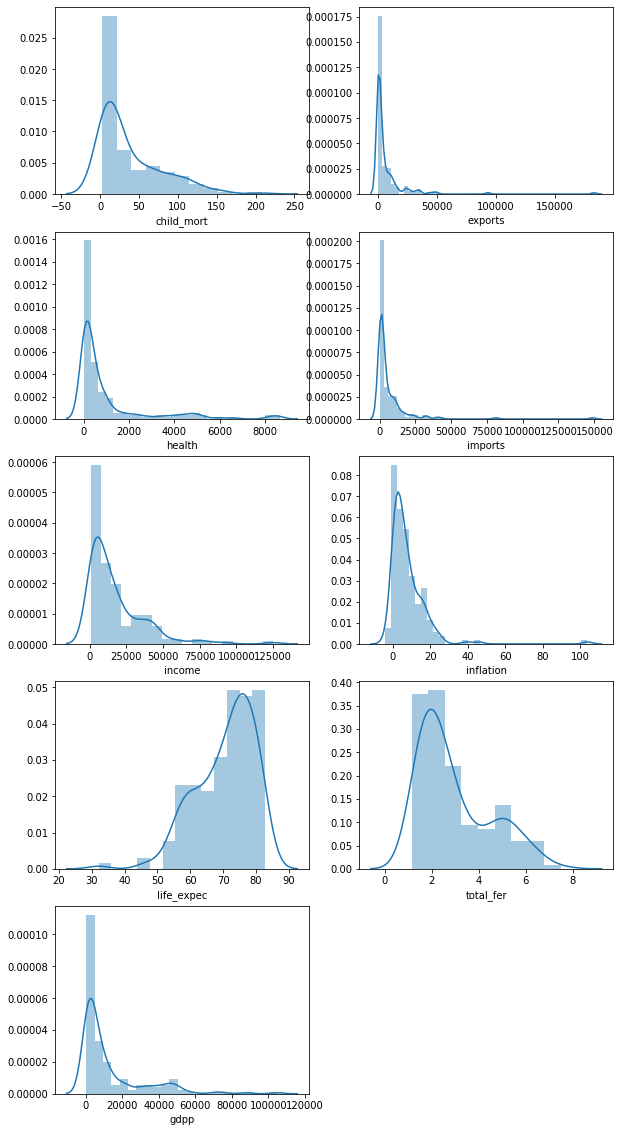

In [9]:
plt.figure(figsize = (10,20))
feature = country_data.columns[1:10]
for i in enumerate(feature):
    plt.subplot(5,2, i[0]+1)
    sns.distplot(country_data[i[1]])

### ii) Bivariate Analysis to understand the realtion between variables

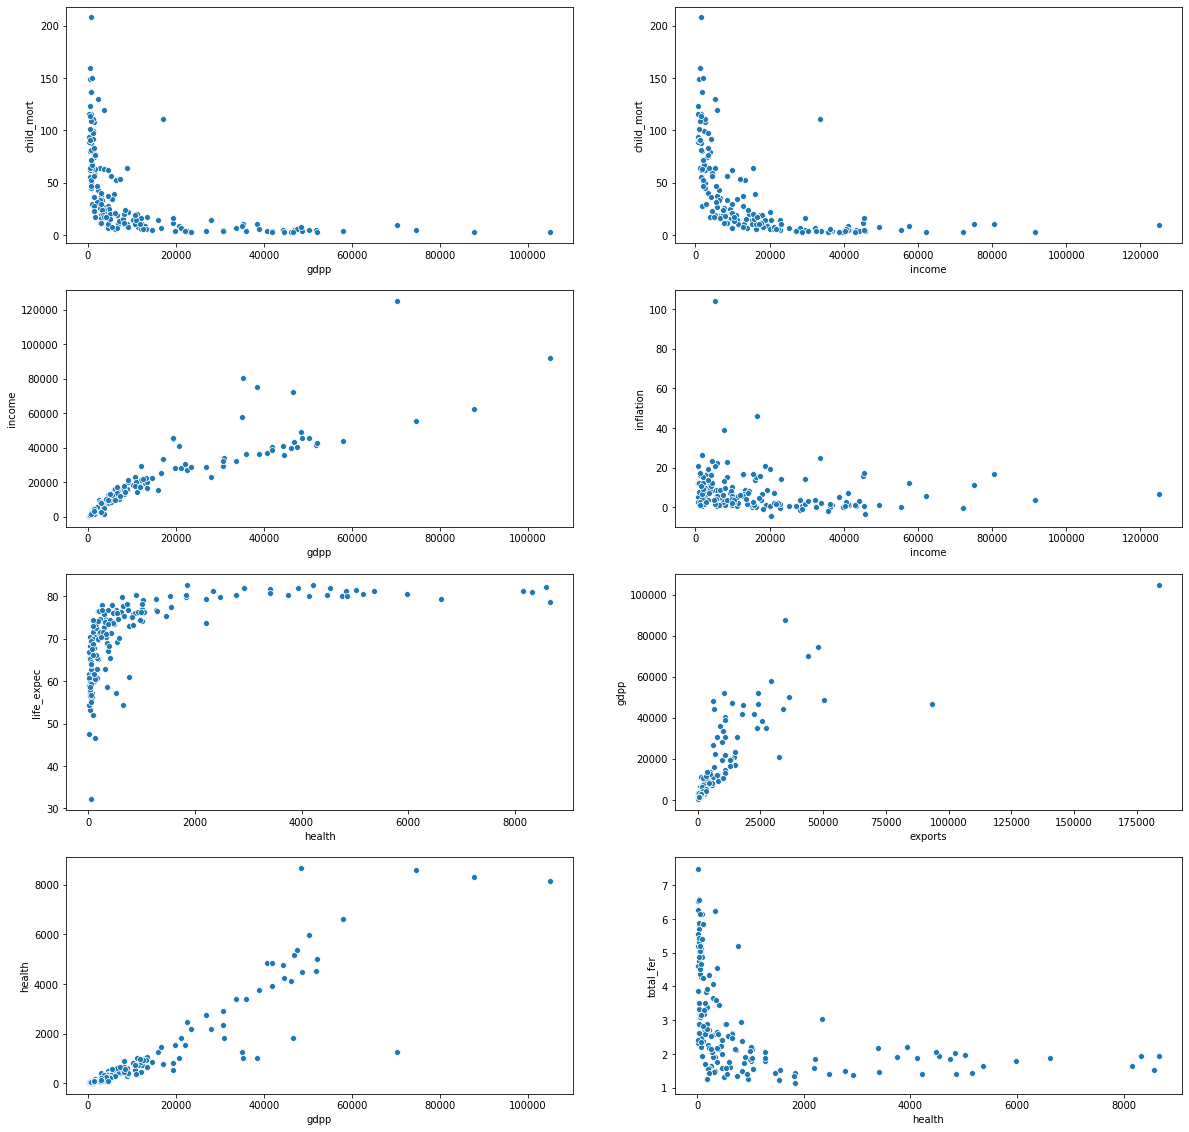

In [10]:
# Scatter plot (gdpp vs child_mort)
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = country_data)
plt.subplot(4,2,2)
sns.scatterplot(x = 'income', y = 'child_mort', data = country_data)
plt.subplot(4,2,3)
sns.scatterplot(x = 'gdpp', y = 'income', data = country_data)
plt.subplot(4,2,4)
sns.scatterplot(x = 'income', y = 'inflation', data = country_data)
plt.subplot(4,2,5)
sns.scatterplot(x = 'health', y = 'life_expec', data = country_data)
plt.subplot(4,2,6)
sns.scatterplot(x = 'exports', y = 'gdpp', data = country_data)
plt.subplot(4,2,7)
sns.scatterplot(x = 'gdpp', y = 'health', data = country_data)
plt.subplot(4,2,8)
sns.scatterplot(x = 'health', y = 'total_fer', data = country_data)


#### GDPP, Child mortality and Income will be used for Cluster profiling, as they have the potential for forming clusters and are important in observing the socio-economic status of a country.

### iii) Outlier Analysis

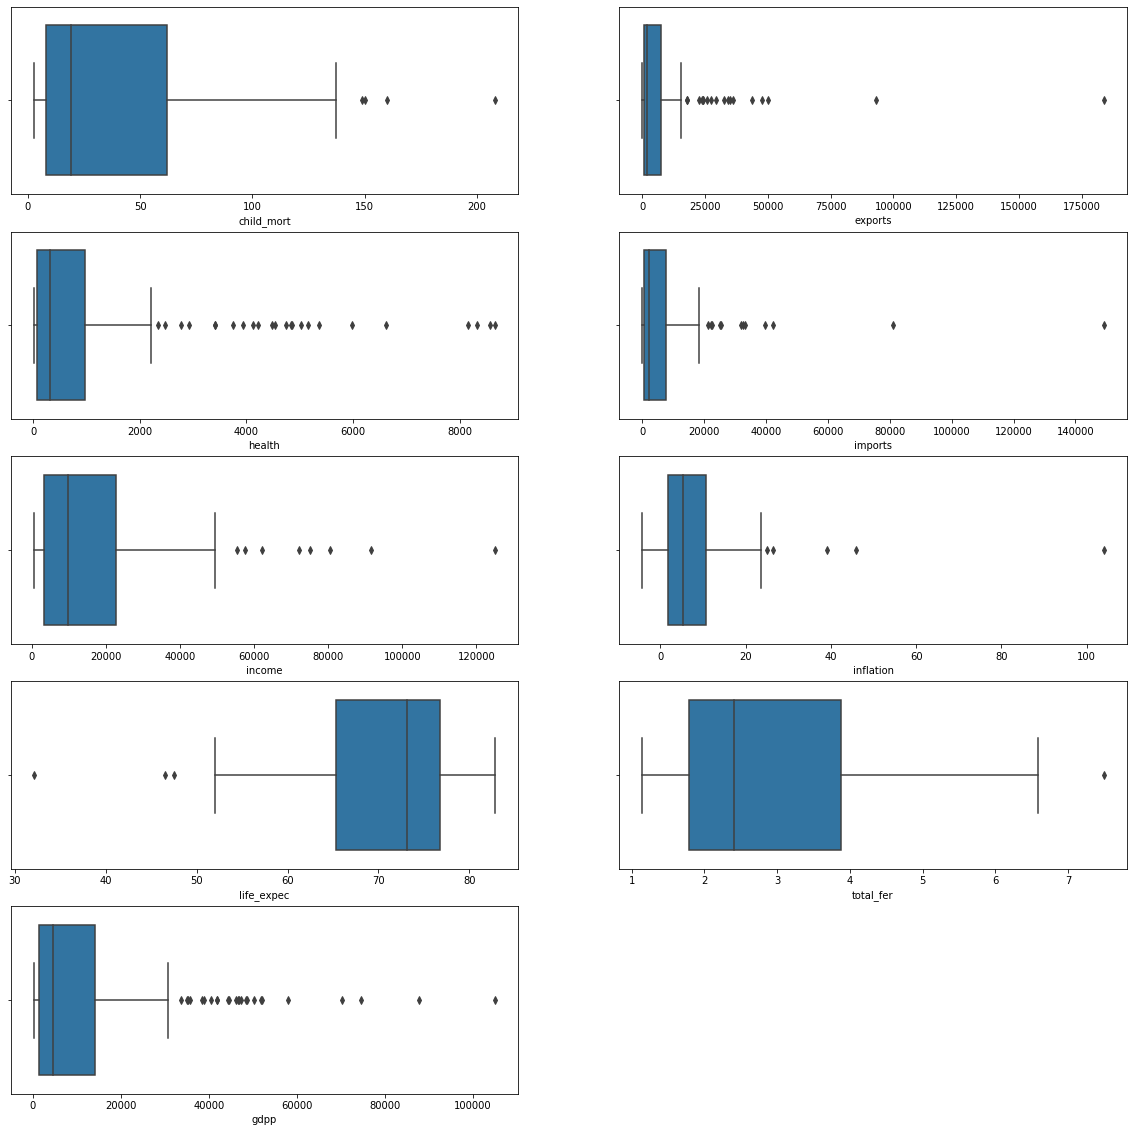

In [11]:
plt.figure(figsize = (20,20))
feature = country_data.columns[1:10]
for i in enumerate(feature):
    plt.subplot(5,2, i[0]+1)
    sns.boxplot(country_data[i[1]])

In [12]:
# No lower range outliers are found except for the Life expectancy column.
# we can use capping to deal with the upper range outliers for the columns--export,health,imports,income,inflation and gdpp.
# for the column child mortality, the upper range outliers need to be retained because high values of  child moratlity play important role in deciding the countries to be funded.

## 4. Outlier Treatment

In [13]:
# Capping exports
# Mid-range capping 5-95 is used.
q1 = country_data['exports'].quantile(0.05)
q4 = country_data['exports'].quantile(0.95)

country_data['exports'][country_data['exports']<= q1] = q1
country_data['exports'][country_data['exports']>= q4] = q4

In [14]:
# Capping health
# Mid-range capping 5-95 is used.
q1 = country_data['health'].quantile(0.05)
q4 = country_data['health'].quantile(0.95)

country_data['health'][country_data['health']<= q1] = q1
country_data['health'][country_data['health']>= q4] = q4

In [15]:
# Capping imports
# Mid-range capping 5-95 is used.
q1 = country_data['imports'].quantile(0.05)
q4 = country_data['imports'].quantile(0.95)

country_data['imports'][country_data['imports']<= q1] = q1
country_data['imports'][country_data['imports']>= q4] = q4

In [16]:
# Capping income
# Mid-range capping 5-95 is used.
q1 = country_data['income'].quantile(0.05)
q4 = country_data['income'].quantile(0.95)

country_data['income'][country_data['income']<= q1] = q1
country_data['income'][country_data['income']>= q4] = q4

In [17]:
# Capping inflation
# Mid-range capping 5-95 is used.
q1 = country_data['inflation'].quantile(0.05)
q4 = country_data['inflation'].quantile(0.95)

country_data['inflation'][country_data['inflation']<= q1] = q1
country_data['inflation'][country_data['inflation']>= q4] = q4

In [18]:
# Capping gdpp
# Mid-range capping 5-95 is used.
q1 = country_data['gdpp'].quantile(0.05)
q4 = country_data['gdpp'].quantile(0.95)

country_data['gdpp'][country_data['gdpp']<= q1] = q1
country_data['gdpp'][country_data['gdpp']>= q4] = q4

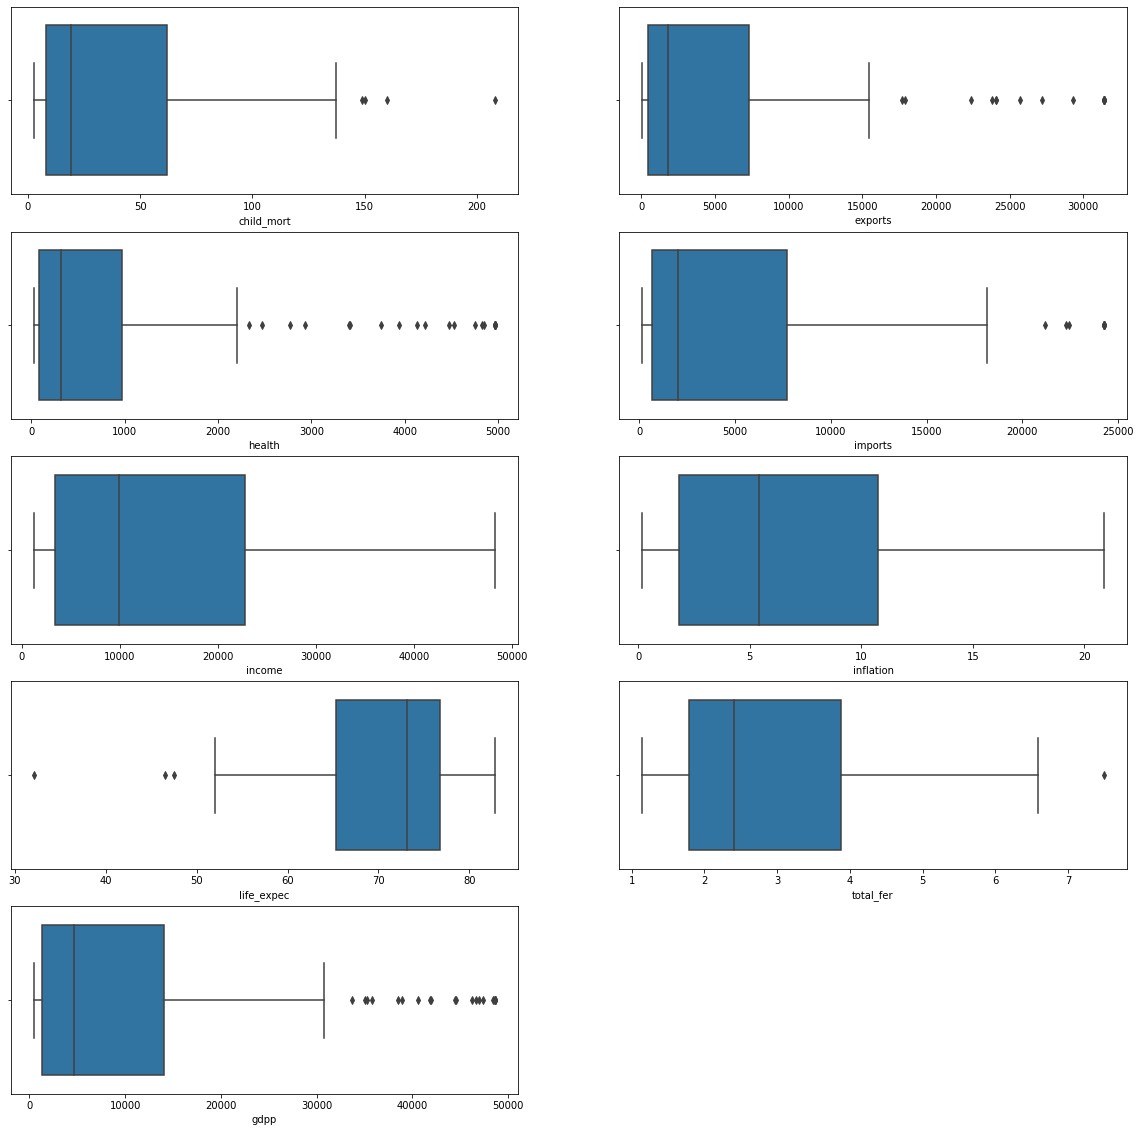

In [19]:
plt.figure(figsize = (20,20))
feature = country_data.columns[1:10]
for i in enumerate(feature):
    plt.subplot(5,2, i[0]+1)
    sns.boxplot(country_data[i[1]])

## 5. Hopkin's Test

In [20]:
# Hopkin's Test

#Calculating the Hopkins statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [21]:
#Testing Hopkin's score
hopkins(country_data.drop('country',axis=1))

0.8778647499484112

#### For multiple runs, the Hopkin's score is observed to be greater than 80%. Therefore the data is good for clustering.

## 6. Scaling

Standardscaling method is used for this case.

In [22]:
import sklearn
from sklearn.preprocessing import StandardScaler

#Instantiate
scaler=StandardScaler()
country_scaled=scaler.fit_transform(country_data.drop('country',axis=1))
country_scaled


array([[ 1.29153238, -0.66803864, -0.62977844, ..., -1.61909203,
         1.90288227, -0.7578739 ],
       [-0.5389489 , -0.54238923, -0.47380714, ...,  0.64786643,
        -0.85997281, -0.52377507],
       [-0.27283273, -0.47604845, -0.53034406, ...,  0.67042323,
        -0.0384044 , -0.49928636],
       ...,
       [-0.37231541, -0.56600553, -0.59686482, ...,  0.28695762,
        -0.66120626, -0.70777132],
       [ 0.44841668, -0.63033074, -0.61187406, ..., -0.34463279,
         1.14094382, -0.70777132],
       [ 1.11495062, -0.61312123, -0.59935647, ..., -2.09278484,
         1.6246091 , -0.69784347]])

In [23]:
# converting into dataframe and assigning column names
country_scaled= pd.DataFrame(country_scaled)
country_scaled.columns = country_data.columns[1:]
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.619092,1.902882,-0.757874
1,-0.538949,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.647866,-0.859973,-0.523775
2,-0.272833,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.670423,-0.038404,-0.499286
3,2.007808,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.179234,2.128151,-0.560839
4,-0.695634,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.704258,-0.541946,0.012991


## 7. Clustering 

###  i) K Means Clustering

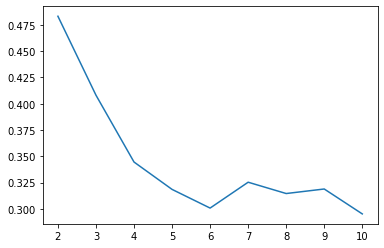

In [24]:
# Finding K
# Silhouette Score


from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_scaled)
    ss.append([k, silhouette_score(country_scaled, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

In [25]:
# K=3 appears like a better choice with good silhouette score.

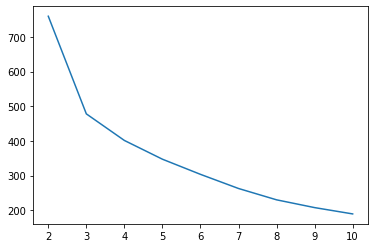

In [26]:
# Elbow Curve-ssd

ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_scaled)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

From the above two results, K is assumed to be as 3.

In [27]:
# For k=3, 
# Final K-Mean clustering

kmean = KMeans(n_clusters = 3, random_state = 100)
kmean.fit(country_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [28]:
# make a copy of country dataframe
country_kmean=country_data.copy()

In [29]:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,0
1,2
2,2
3,0
4,2


In [30]:
# concatenating label column in the actual dataframe
country_kmean = pd.concat([country_kmean, label], axis =1)
country_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [31]:
# Number of data points in each cluster
country_kmean.label.value_counts()

2    82
0    48
1    37
Name: label, dtype: int64

#### To understand the relation among the selected columns for cluster profiling, bivariate analysis is done using scatter plots.

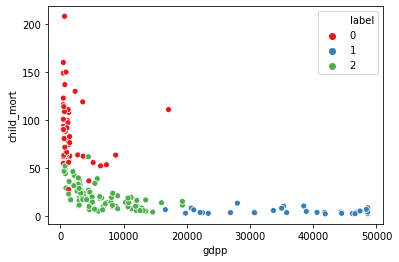

In [32]:
# Scatter plot (gdpp vs child_mort)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'label', data = country_kmean, palette = 'Set1')

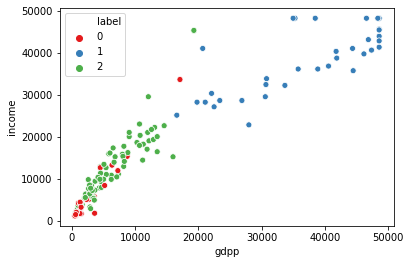

In [33]:
# Scatter plot (gdpp vs income)
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'label', data = country_kmean, palette = 'Set1')

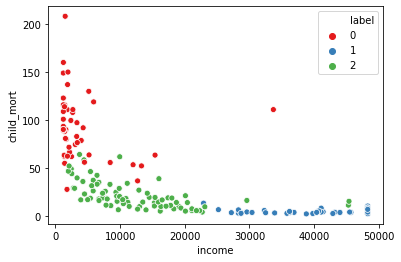

In [34]:
# Scatter plot (income vs Child_mort)
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'label', data = country_kmean, palette = 'Set1')

####  Different colous indicates different clusters and the above scatter plots show how the clusters  are disctributed with respect to another related variable. These plots are depicting that the Child mortality is high where the net income per person is low and gdpp of the country is less.


### Cluster Profiling

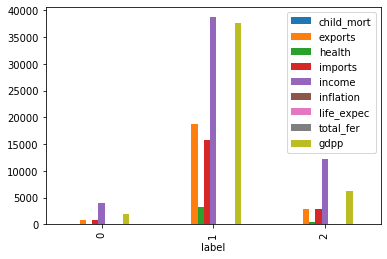

In [35]:
# Making sense out of the clusters
country_kmean.drop('country', axis = 1).groupby('label').mean().plot(kind = 'bar')

Some of the columns including Child mortality are not visible in the plot due to the large difference in magnitudes. So Log scale is used for y axis.

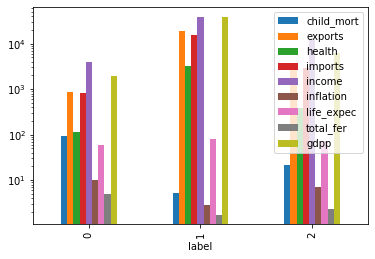

In [36]:
# Making sense out of the clusters (log scale)
country_kmean.drop('country', axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.yscale('log')
plt.show()

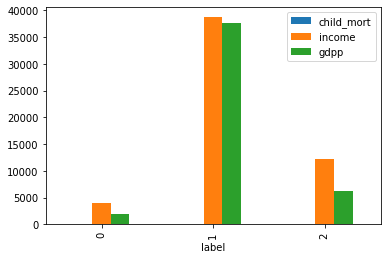

In [37]:
# Focussing on GDP,Child_mort and Income 
country_kmean.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('label').mean().plot(kind = 'bar')


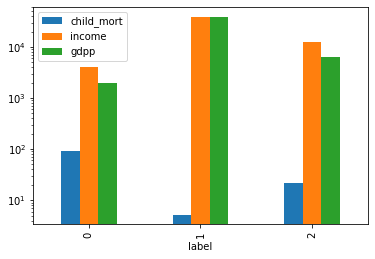

In [38]:
# Focussing on GDP,Child_mort and Income (log scale to display child_mortality)
country_kmean.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.yscale('log')
plt.show()

Seeing all the data of the clusters , we can say that  cluster 0 is to be focussed as it is having Higher Child_mortality in addition to low income and low gdpp.

        Cluster 0 -- low income,low gdpp and High Child_mortality
        
        Cluster 1 --High income, High gdpp and Low Child_mortality  
        
        Cluster 2 -- Medium income,Medium gdpp and Medium Child_mortality

In [39]:
# Filter the data for that cluster 0

country_kmean[country_kmean['label'] == 0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [40]:
# Sort the data in cluster 0 as per low income,low gdpp and High Child_mortality and print Top 5
country_kmean[country_kmean['label'] == 0].sort_values(by =['child_mort','income','gdpp',], ascending = [False,True,True]).head(5)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.2860,45.74420,428.314,1500.0,5.45,32.1,3.33,662.0,0
132,Sierra Leone,160.0,70.4688,52.26900,169.281,1220.0,17.20,55.0,5.20,465.9,0
32,Chad,150.0,330.0960,40.63410,390.195,1930.0,6.39,56.5,6.59,897.0,0
31,Central African Republic,149.0,70.4688,26.71592,169.281,1213.0,2.01,47.5,5.21,465.9,0
97,Mali,137.0,161.4240,35.25840,248.508,1870.0,4.37,59.5,6.55,708.0,0


### ii) Hierarchical Clustering

In [41]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### a) Single linkage

In [42]:
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.619092,1.902882,-0.757874
1,-0.538949,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.647866,-0.859973,-0.523775
2,-0.272833,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.670423,-0.038404,-0.499286
3,2.007808,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.179234,2.128151,-0.560839
4,-0.695634,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.704258,-0.541946,0.012991


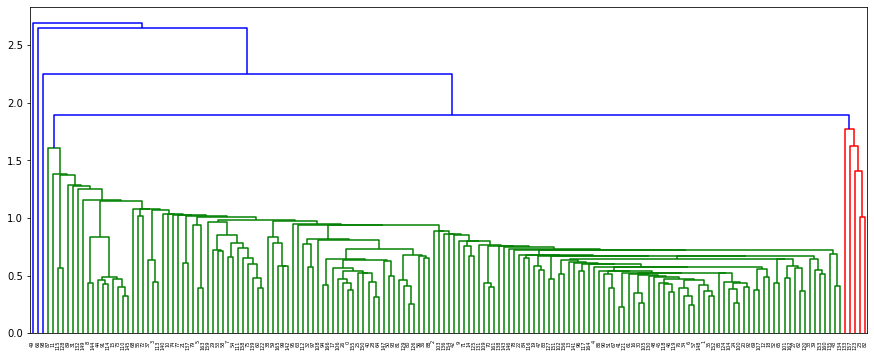

In [43]:
# Single linkage
plt.figure(figsize = (15,6))
country_linkage=linkage(country_scaled,method="single",metric="euclidean")
dendrogram(country_linkage)
plt.show()

In [44]:
# 5 Clusters can be observed.

In [45]:
#5 clusters
cut_tree(country_linkage,n_clusters=5).shape


(167, 1)

In [46]:
# make a opy of country dataframe
country_singlink=country_data.copy()

In [47]:
# assigning cluster number
cluster_labels1=cut_tree(country_linkage,n_clusters=5).reshape(-1,)

In [48]:
country_singlink['cluster_labels1']=cluster_labels1
country_singlink.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels1
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


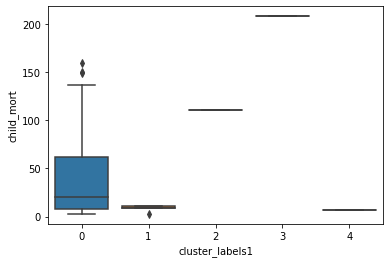

In [49]:
# plots
sns.boxplot(x='cluster_labels1', y='child_mort', data=country_singlink)

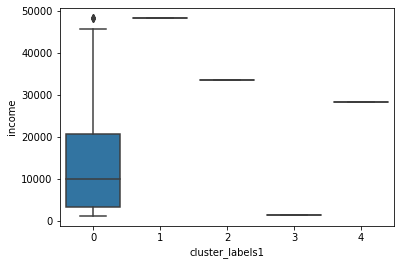

In [50]:
# plots
sns.boxplot(x='cluster_labels1', y='income', data=country_singlink)

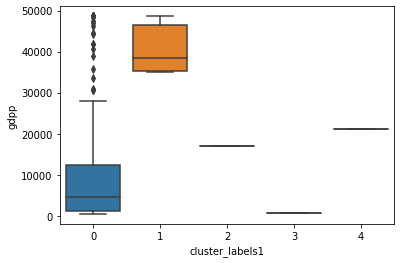

In [51]:
# plots
sns.boxplot(x='cluster_labels1', y='gdpp', data=country_singlink)

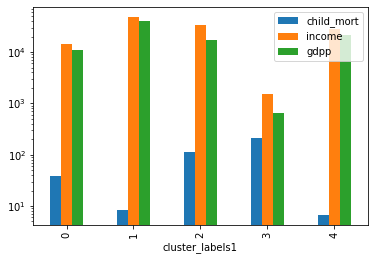

In [52]:
# Focussing on GDP,Child_mort and Income
country_singlink.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('cluster_labels1').mean().plot(kind = 'bar')
plt.yscale('log')
plt.show()

Cluster 3 is having High Child mortality, Low income and low gdpp. So this is the cliuster of countries which need to be focussed.


In [53]:
# Countries in cluster 3
country_singlink[country_singlink['cluster_labels1'] ==3]['country']

66    Haiti
Name: country, dtype: object

In [54]:
country_singlink['cluster_labels1'].value_counts()

0    159
1      5
4      1
3      1
2      1
Name: cluster_labels1, dtype: int64

Cluster 3 should be considered for providing the aid. 

In [55]:
#only one country in cluster 3
# country in cluster 3 having low income,low gdpp and High Child_mortality when compared to all other countries in the list
country_singlink[country_singlink['cluster_labels1'] ==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels1
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.33,662.0,3


The result of single linkage is not giving a complete idea avbout the countries with required conditions . So we will go for complete linkage variation in hierachical clustering.

### b) Complete Linkage

In [56]:
country_complink=country_data.copy()

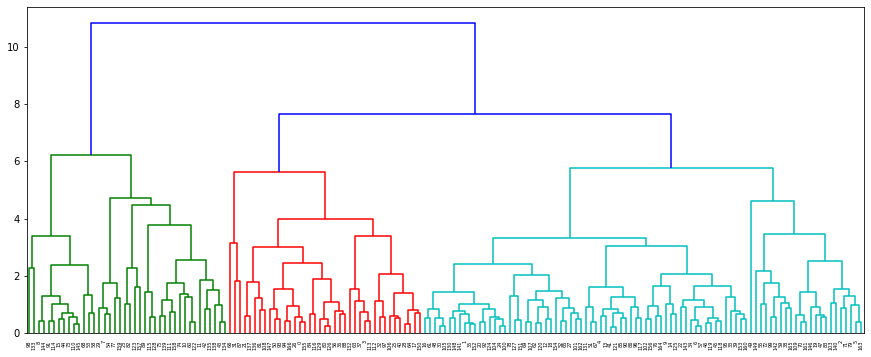

In [57]:
#complete linkage
plt.figure(figsize = (15,6))
country_comp=linkage(country_scaled,method="complete",metric="euclidean")
dendrogram(country_comp)
plt.show()

In [58]:
#3 clusters
cut_tree(country_comp,n_clusters=3).shape


(167, 1)

In [59]:
# assign cluster label
cluster_labels=cut_tree(country_comp,n_clusters=3).reshape(-1,)

In [60]:
country_complink['cluster_labels']=cluster_labels
country_complink.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [61]:
# Number of countries in each cluster
country_complink['cluster_labels'].value_counts()

1    88
2    40
0    39
Name: cluster_labels, dtype: int64

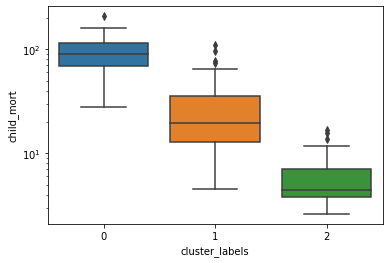

In [62]:
# plots
sns.boxplot(x='cluster_labels', y='child_mort', data=country_complink)
plt.yscale('log')
plt.show()

It indicates that median of Child moratlity in the clusters is indicated as follows:

                    Cluster 0 -- High
                    Cluster 1 -- Medium
                    Cluster 2 -- Low
                   

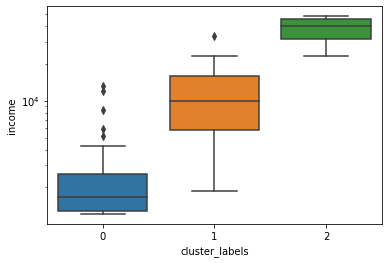

In [63]:
# plots
sns.boxplot(x='cluster_labels', y='income', data=country_complink)
plt.yscale('log')
plt.show()

It indicates that median of income in the clusters is indicated as follows:

                   Cluster 0 -- Low 
                   Cluster 1 -- Medium
                   Cluster 2 -- High       

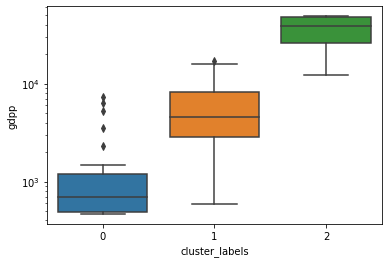

In [64]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=country_complink)
plt.yscale('log')
plt.show()

## It indicates that median of gdpp in the clusters is indicated as follows:

                   Cluster 0 -- Low 
                   Cluster 1 -- Medium
                   Cluster 2 -- High

So Our Focus should be on Cluster 0 here, with Low gdpp, low income and High child mortlity.


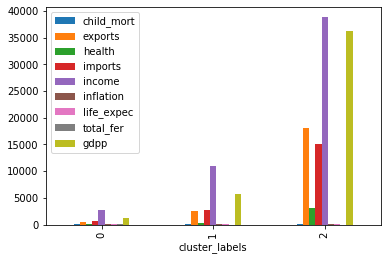

In [65]:
# Making sense out of the clusters
country_complink.drop('country', axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')
plt.show()

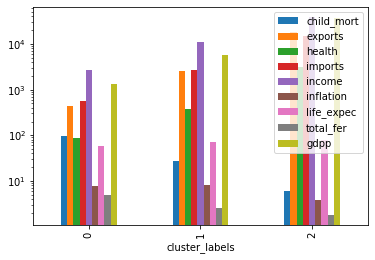

In [66]:
# Making sense out of the clusters (log scale)
country_complink.drop('country', axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')
plt.yscale('log')
plt.show()

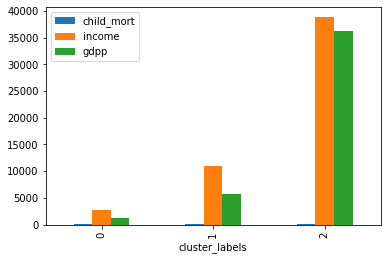

In [67]:
# Focussing on GDP,Child_mort and Income
country_complink.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')
plt.show()

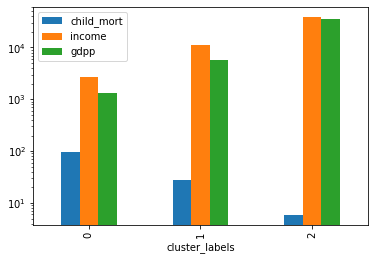

In [68]:
# Focussing on GDP,Child_mort and Income (log scale)
country_complink.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')
plt.yscale('log')
plt.show()

From the Bar graphs also, it tells the same story, cluster 0 should be of our interest with low income and low gdpp and high child mortality.


In [69]:
# Top 5 countries in cluster 0
# Sort the data in cluster 0 as per low income,low gdpp and High Child_mortality and print Top 5
country_complink[country_complink['cluster_labels'] == 0].sort_values(by =['child_mort','income','gdpp'], ascending = [False,True,True]).head(5)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
66,Haiti,208.0,101.2860,45.74420,428.314,1500.0,5.45,32.1,3.33,662.0,0
132,Sierra Leone,160.0,70.4688,52.26900,169.281,1220.0,17.20,55.0,5.20,465.9,0
32,Chad,150.0,330.0960,40.63410,390.195,1930.0,6.39,56.5,6.59,897.0,0
31,Central African Republic,149.0,70.4688,26.71592,169.281,1213.0,2.01,47.5,5.21,465.9,0
97,Mali,137.0,161.4240,35.25840,248.508,1870.0,4.37,59.5,6.55,708.0,0


### 8. Final Analysis and Recommendations:


a)  From the inferences made from the above clustering techniques, we can say that single linkage is not good enough to take a decision. However, Sigle linkage also shows the country Haiti as the suggested one, which is the first country in the Top-5 suggested countries using the other two clustering techniques.

b) The Other two clustering Techniques( KMeans clustering & Hierarchical- Complete Linkage) have suggested the same set of Top 5 countries with direst need of aid.
    Those countries are:
        
        i)   Haiti
        ii)  Sierra Leone
        iii) Chad
        iv)  Central African Republic
        v)   Mali
        
c) The above mentioned countries can be provided with the aid as they are proved to be with higher child mortality rate, Low gdpp, low net income per person.

d) The list of Top 5 countries may vary a according to the order of columns mentioned in the sorting list. 

e) The order used in this analysis is Child mortality rate , income , gdpp.

        
    